
### Segmenting and Clustering Neighborhoods in Toronto
In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.

#### Scrap Wikipedia for data using Pandas
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

## Solving for Question 1

In [104]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins
from folium.plugins import MarkerCluster

print('Libraries imported.')

Libraries imported.


In [105]:
#creating new notebook
#Data can be read through wiki by one line of code,pandas makes it much easier.

import pandas as pd
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
type(df)
df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [106]:
# shape of the dataframe including "Assigned" and "Not assigned" borough
df.shape

(180, 3)

In [107]:
# Borough has 77 number of Not Assigned and they have to be ignored/removed.
df["Borough"].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [108]:
#re-writting the same DataFrame by using not equal to operator.
df=df.query('Borough != "Not assigned"')
#removing "NOt assigned" from Borough also removes "not assigned" from Neighborhood
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [109]:
#shape of DF after removing "Not assigned"
df.shape

(103, 3)

In [110]:
# resetting the index
df=df.reset_index(drop=True)

#final dataframe to be considered
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [111]:
# END of Question 1 

## Solving Question 2:

In [112]:
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [113]:
#get latitude and longitude using geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Toronto, Ontario'.format('Postal Code'))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

print(latitude,longitude )

43.648690000000045 -79.38543999999996


In [114]:
#read geospatial data file
url = 'http://cocl.us/Geospatial_data'
geotable = pd.read_csv(url)
geotable.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [115]:
#append lat & long into table[0]
toronto = pd.merge(df, geotable, left_on='Postal Code', right_on='Postal Code', left_index=False, right_index=False)
toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [116]:
#make a map of all Toronto neighborhoods
#Get the coordinates of Toronto
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Toronto, Ontario')
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

#create a folium map of Toronto with Boroughs
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill_color='blue').add_to(map_Toronto)
map_Toronto


In [117]:
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [118]:
toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [119]:
df.groupby("Borough").count()

,Postal Code,Neighborhood
Borough,,
Central Toronto,9,9
Downtown Toronto,19,19
East Toronto,5,5
East York,5,5
Etobicoke,12,12
Mississauga,1,1
North York,24,24
Scarborough,17,17
West Toronto,6,6


In [120]:
# let us choose Downtown Toronto as Toronto being the major Canadian city and capital of the province of Ontario.
# selecting only downtown Toronto 

downtown = toronto[toronto['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [121]:
downtown.shape

(19, 5)

In [122]:
#make a map of Downtown neighborhoods.
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Toronto, Ontario'.format('Postal_Code'))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

map_Downtown = folium.Map(location=[latitude, longitude], zoom_start=13
                        )
for lat, lng, neighborhood in zip(downtown['Latitude'], downtown['Longitude'], downtown['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label)
    folium.Marker([lat, lng], radius=3, popup=label, color='black', fill_color='red').add_to(map_Downtown)
map_Downtown

In [123]:
# Let's put in the Foursquare credentials for the rest of this project.
CLIENT_ID = 'IH3ZKHC45YKI1EMH2X2VZWTIH24LATCGPRKIVPVHN1QFQBBI'
CLIENT_SECRET = 'OCBAWDAZOQJBNKE2FSEZF0G2GJNPDDJMOZBZE5V2F3PPEYNV'
VERSION = '20180605'
print("loaded")

loaded


In [124]:
# Let's explore the first neighborhood in the dataframe. If I have time, I'd like to do this again with more recent data because of the Stay at Home orders that are out there.
RegentHarbour = downtown

neighborhood_name = RegentHarbour.loc[0, 'Neighborhood']
neighborhood_latitude = RegentHarbour.loc[0, 'Latitude']
neighborhood_longitude = RegentHarbour.loc[0, 'Longitude']
print('The latitude and longitude of {} are {} and {}.'.format(neighborhood_name,
                                                                  neighborhood_latitude, neighborhood_longitude))

The latitude and longitude of Regent Park, Harbourfront are 43.6542599 and -79.3606359.


In [125]:
# Get the top 100 venues in Regent Park and Harbourfront.
LIMIT =100
radius = 500
Top100 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
Top100

'https://api.foursquare.com/v2/venues/explore?client_id=IH3ZKHC45YKI1EMH2X2VZWTIH24LATCGPRKIVPVHN1QFQBBI&client_secret=OCBAWDAZOQJBNKE2FSEZF0G2GJNPDDJMOZBZE5V2F3PPEYNV&ll=43.6542599,-79.3606359&v=20180605&radius=500&limit=100'

In [126]:
results = requests.get(Top50).json()
results

{'meta': {'code': 200, 'requestId': '5f086f3a889e09361907d555'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 43.6569599027, 'lng': -79.35691110008916},
   'sw': {'lat': 43.6515598973, 'lng': -79.36436069991085}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',


In [127]:
# We're going to need a list of categories.
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
            
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [128]:
# Let's clean this up a bit and put it into a dataframe. For fun, I'm going to include the address in my df, not just category.
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# Filter the columns that we'd like in the df.
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.address']
nearby_venues = nearby_venues.loc[:, filtered_columns]

#Filter the category for each row. (I feel like this could be considered applying our category definition to the df, how we'd like it displayed.)
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

#Define how we'd like to separate the columns.
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,address
0,Roselle Desserts,Bakery,43.653447,-79.362017,362 King St E
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809,368 King St E
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008,461 Cherry St
3,Body Blitz Spa East,Spa,43.654735,-79.359874,497 King Street East
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149,457 King St. E


In [129]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

13 venues were returned by Foursquare.


In [130]:
# Let's get that list of venues in a df with the lat/long for the venue.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
        #api request
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        #get request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #return only the info we want
        venues_list.append([(name, lat, lng,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood'],['Neighborhood Latitude'],['Neighborhood Longitude'],['Venue'],['Venue Latitude'],['Venue Longitude'],['Venue Category']
            
    return(nearby_venues)

In [131]:
downtown_venues = getNearbyVenues(names=downtown['Neighborhood'], latitudes=downtown['Latitude'], longitudes=downtown['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [132]:
print(downtown_venues.shape)
downtown_venues.head()

(1228, 7)


,"(Neighborhood,)","(Neighborhood Latitude,)","(Neighborhood Longitude,)","(Venue,)","(Venue Latitude,)","(Venue Longitude,)","(Venue Category,)"
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park


In [133]:
downtown_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park


In [134]:
#Number of venues in each Neighborhood
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,70,70,70,70,70,70
Christie,16,16,16,16,16,16
Church and Wellesley,71,71,71,71,71,71
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [135]:
#one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']

#move neighborhood to first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

print(downtown_onehot.shape)
downtown_onehot.head()

(1228, 206)


,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [136]:
#group rows by neighborhood and find freqency of each category
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.017241,0.000000,0.000000,0.0,0.017241,0.0000,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.000000,0.000000,0.000000,0.0,0.017241,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.034483,0.0,0.0000,0.000000,0.034483,0.0,0.0,0.0,0.000000,0.051724,0.086207,0.0,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.000000,0.0,0.000000,0.017241,0.0,0.0,0.0,0.000000,0.034483,0.000000,0.0,0.0,0.017241,0.000000,0.0,0.0,0.017241,0.017241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.017241,0.0,0.000000,0.017241,0.0,0.017241,0.000000,0.017241,0.017241,0.0,0.017241,0.0,0.0,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.034483,0.0000

In [137]:
#Find the top 5 venues for each neighborhood.
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2        Bakery  0.03
3      Beer Bar  0.03
4    Restaurant  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.21
1      Harbor / Marina  0.07
2              Airport  0.07
3  Rental Car Location  0.07
4          Coffee Shop  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1   Italian Restaurant  0.07
2       Sandwich Place  0.07
3                 Café  0.04
4  Japanese Restaurant  0.04


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3     Baby Store  0.06
4    Candy Store  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1     Sushi Restaurant  0.06
2  Japanese Restaurant  0.06
3              Gay Bar  0.04
4           Restauran

In [138]:
#Let's put this in a df by the most common venues

#Start by putting our categories in order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [139]:
#Create the dataframe with the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']  #As in 1st, 2nd, 3rd

#create the columns
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind])) #column_number+'st', column_number+'nd', column_number+'rd'
    except:
        columns.append('{}th Most Common Venue'.format(ind+1)) #4th, 5th, etc
    
#create df
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Farmers Market,Seafood Restaurant,Bakery,Restaurant,Pharmacy,Beer Bar
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Harbor / Marina,Boat or Ferry,Plane,Rental Car Location,Sculpture Garden,Boutique,Coffee Shop,Airport Lounge,Airport Terminal
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Bar,Thai Restaurant,Salad Place,Burger Joint,Bubble Tea Shop
3,Christie,Grocery Store,Café,Park,Nightclub,Diner,Restaurant,Baby Store,Candy Store,Italian Restaurant,Coffee Shop
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Mediterranean Restaurant,Pub,Hotel,Men's Store


In [142]:
#I'm going to try narrowing it down to just the Boroughs with Toronto in their names.
toronto_buroughs = toronto[toronto['Borough'].astype(str).str.contains('Toronto')]
toronto_buroughs

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [143]:
# Let's get that list of venues in a df with the lat/long for the venue.
latitudes = toronto_buroughs['Latitude']
longitudes = toronto_buroughs['Longitude']

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
        #api request
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        #get request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #return only the info we want
        venues_list.append([(name, lat, lng,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood'],['Neighborhood Latitude'],['Neighborhood Longitude'],['Venue'],['Venue Latitude'],['Venue Longitude'],['Venue Category']
            
    return(nearby_venues)

In [144]:
toronto_buroughs_venues = getNearbyVenues(names=toronto_buroughs['Neighborhood'], latitudes=toronto_buroughs['Latitude'], longitudes=toronto_buroughs['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [145]:
print(toronto_buroughs_venues.shape)
toronto_buroughs_venues

(1625, 7)


,"(Neighborhood,)","(Neighborhood Latitude,)","(Neighborhood Longitude,)","(Venue,)","(Venue Latitude,)","(Venue Longitude,)","(Venue Category,)"
0,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
5,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
7,"Regent Park, Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
8,"Regent Park, Harbourfront",43.654260,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
9,"Regent Park, Harbourfront",43.654260,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [146]:
# Stupid column names
toronto_buroughs_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
toronto_buroughs_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park


In [147]:
#How many are in each neighborhood?
toronto_buroughs_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18,18,18,18,18,18
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,70,70,70,70,70,70
Christie,16,16,16,16,16,16
Church and Wellesley,71,71,71,71,71,71
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [148]:
print('There are {} unique categories.'.format(len(toronto_buroughs_venues['Venue Category'].unique())))

There are 232 unique categories.


In [149]:
#one hot
toronto_buroughs_onehot = pd.get_dummies(toronto_buroughs_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_buroughs_onehot['Neighborhood'] = toronto_buroughs_venues['Neighborhood']

fixed_columns = [toronto_buroughs_onehot.columns[-1]] + list(toronto_buroughs_onehot.columns[:-1])
toronto_buroughs_onehot = toronto_buroughs_onehot[fixed_columns]

toronto_buroughs_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [150]:
toronto_buroughs_onehot.shape

(1625, 232)

In [151]:
toronto_buroughs_grouped = toronto_buroughs_onehot.groupby('Neighborhood').mean().reset_index()
toronto_buroughs_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.0000,0.017241,0.034483,0.000000,0.000000,0.00,0.017241,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.00,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.034483,0.00,0.000000,0.0000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.051724,0.086207,0.000000,0.000000,0.000000,0.00,0.000000,0.017241,0.000000,0.017241,0.000000,0.00,0.000000,0.000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.00000

In [152]:
toronto_buroughs_grouped.shape

(39, 232)

In [153]:
#Top 5 venue from each neighborhood.
num_top_venues = 5

for hood in toronto_buroughs_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_buroughs_grouped[toronto_buroughs_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Restaurant  0.03
3      Beer Bar  0.03
4          Café  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3     Yoga Studio  0.04
4      Restaurant  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.11
1          Comic Shop  0.06
2       Garden Center  0.06
3                Park  0.06
4    Recording Studio  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.21
1      Harbor / Marina  0.07
2              Airport  0.07
3          Coffee Shop  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1   Ital

In [154]:
#Let's recreate our Top 10 dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [155]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
Tburoughs_venues_sorted = pd.DataFrame(columns=columns)
Tburoughs_venues_sorted['Neighborhood'] = toronto_buroughs_grouped['Neighborhood']

for ind in np.arange(toronto_buroughs_grouped.shape[0]):
    Tburoughs_venues_sorted.iloc[ind,1:] = return_most_common_venues(toronto_buroughs_grouped.iloc[ind, :], num_top_venues)
    
Tburoughs_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Café,Restaurant,Pharmacy,Bakery,Farmers Market,Beer Bar,Seafood Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Bakery,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Garden,Brewery,Burrito Place,Spa,Farmers Market,Fast Food Restaurant,Butcher,Restaurant,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Harbor / Marina,Boat or Ferry,Coffee Shop,Plane,Rental Car Location,Sculpture Garden,Boutique,Airport Terminal,Airport
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Thai Restaurant,Bar,Salad Place


In [156]:
# Now for the good part!
#k-means clustering
kclusters = 5
tb_grouped_clustering = toronto_buroughs_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tb_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [157]:
#Create a new df that includes the cluster and Top 10 for each neighborhood
#add clustering labels
Tburoughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
TB_merged = toronto_buroughs

#merge TB_merged w/ toronto to add lat/long
TB_merged = TB_merged.join(Tburoughs_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

TB_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Café,Hotel,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant,Bookstore
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Café,Coffee Shop,Cocktail Bar,American Restaurant,Cosmetics Shop,Moroccan Restaurant,Creperie,Department Store,Beer Bar
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [160]:
#Let's put them all on a map!
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

#set colors scheme for clusters
x = np.arange(kclusters)
ys = [i + x +(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers
markers_colors = []
for lat, lon, poi, cluster in zip(TB_merged['Latitude'], TB_merged['Longitude'], TB_merged['Neighborhood'], TB_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                       radius=5, 
                       popup=label, 
                       color=rainbow[cluster-1], 
                       fill=True, 
                       fill_color=rainbow[cluster-1], 
                       fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [161]:
#Let's take a look at the first cluster.
TB_merged.loc[TB_merged['Cluster Labels'] == 0, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
4,Downtown Toronto,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
9,Downtown Toronto,0,Clothing Store,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Café,Hotel,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant,Bookstore
15,Downtown Toronto,0,Restaurant,Café,Coffee Shop,Cocktail Bar,American Restaurant,Cosmetics Shop,Moroccan Restaurant,Creperie,Department Store,Beer Bar
19,East Toronto,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop
20,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Cheese Shop,Café,Restaurant,Pharmacy,Bakery,Farmers Market,Beer Bar,Seafood Restaurant
24,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Thai Restaurant,Bar,Salad Place
25,Downtown Toronto,0,Grocery Store,Café,Park,Nightclub,Diner,Candy Store,Italian Restaurant,Restaurant,Baby Store,Coffee Shop
30,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Gym,Clothing Store,Deli / Bodega,Thai Restaurant,Concert Hall,Steakhouse
31,West Toronto,0,Bakery,Pharmacy,Pet Store,Middle Eastern Restaurant,Music Venue,Park,Recording Studio,Café,Brewery,Supermarket


In [162]:
#The second
TB_merged.loc[TB_merged['Cluster Labels'] == 1, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Central Toronto,1,Park,Bus Line,Swim School,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [163]:
#The third
TB_merged.loc[TB_merged['Cluster Labels'] == 2, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Central Toronto,2,Garden,Home Service,Department Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [164]:
#The fourth
TB_merged.loc[TB_merged['Cluster Labels'] == 3, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Central Toronto,3,Trail,Mexican Restaurant,Jewelry Store,Sushi Restaurant,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [165]:
#The fifth
TB_merged.loc[TB_merged['Cluster Labels'] == 4, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Central Toronto,4,Park,Lawyer,Trail,Restaurant,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
91,Downtown Toronto,4,Park,Playground,Trail,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


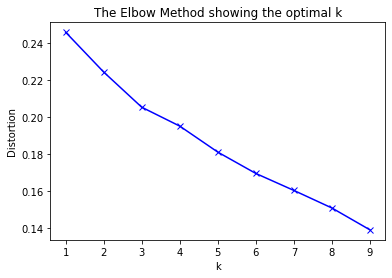

In [166]:
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tb_grouped_clustering)
    kmeanModel.fit(tb_grouped_clustering)
    distortions.append(sum(np.min(cdist(tb_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tb_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [167]:
kclusters = 3
tb_grouped_clustering = toronto_buroughs_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tb_grouped_clustering)
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [168]:
#Create a new df that includes the cluster and Top 10 for each neighborhood
#add clustering labels
#Tburoughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
TB_merged = toronto_buroughs

#merge TB_merged w/ toronto to add lat/long
TB_merged = TB_merged.join(Tburoughs_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right')

TB_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Café,Hotel,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant,Bookstore
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Café,Coffee Shop,Cocktail Bar,American Restaurant,Cosmetics Shop,Moroccan Restaurant,Creperie,Department Store,Beer Bar
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [169]:
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [170]:
#Let's put them all on a map!
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

#set colors scheme for clusters
x = np.arange(kclusters)
ys = [i + x +(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers
markers_colors = []

for cluster in range(0,kclusters): 
    group = folium.FeatureGroup(name='<span style=\\"color: {0};\\">{1}</span>'.format(rainbow[cluster-1],cluster))
    for lat, lon, poi, label in zip(TB_merged['Latitude'], TB_merged['Longitude'], TB_merged['Neighborhood'], TB_merged['Cluster Labels']):
        if int(label) == cluster: 
            label = folium.Popup('ORIG. '+ str(poi) + 'Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.7).add_to(group)
    group.add_to(map_clusters)

    
map_clusters




In [171]:
#Let's take a look at the first cluster.
TB_merged.loc[TB_merged['Cluster Labels'] == 0, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
4,Downtown Toronto,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
9,Downtown Toronto,0,Clothing Store,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Café,Hotel,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant,Bookstore
15,Downtown Toronto,0,Restaurant,Café,Coffee Shop,Cocktail Bar,American Restaurant,Cosmetics Shop,Moroccan Restaurant,Creperie,Department Store,Beer Bar
19,East Toronto,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop
20,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Cheese Shop,Café,Restaurant,Pharmacy,Bakery,Farmers Market,Beer Bar,Seafood Restaurant
24,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Thai Restaurant,Bar,Salad Place
25,Downtown Toronto,0,Grocery Store,Café,Park,Nightclub,Diner,Candy Store,Italian Restaurant,Restaurant,Baby Store,Coffee Shop
30,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Gym,Clothing Store,Deli / Bodega,Thai Restaurant,Concert Hall,Steakhouse
31,West Toronto,0,Bakery,Pharmacy,Pet Store,Middle Eastern Restaurant,Music Venue,Park,Recording Studio,Café,Brewery,Supermarket


In [172]:
#Let's take a look at the second cluster.
TB_merged.loc[TB_merged['Cluster Labels'] == 1, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Central Toronto,1,Park,Bus Line,Swim School,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [173]:
#Let's take a look at the third cluster.
TB_merged.loc[TB_merged['Cluster Labels'] == 2, TB_merged.columns[[1] + list(range(5, TB_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Central Toronto,2,Garden,Home Service,Department Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [ ]:
#Coffee Shops and Cafes seem to be pretty common in the first segment, but there still seem to be a few venues that don't quite seem to fit.